In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
from datetime import datetime,date
import seaborn as sns
import folium
from IPython.display import HTML

In [2]:
os.chdir('E:\\Study\\STA141B\\Project')

In [3]:
ds = pd.read_csv('data scientist.csv',index_col=False)
del ds['Unnamed: 0']

<h2>Posting Dates

In [95]:
Counter(ds['post_date']).keys()

['02/17/2017',
 '03/03/2017',
 '01/04/2017',
 '01/17/2017',
 '02/02/2017',
 '02/03/2017',
 '12/14/2016',
 '01/09/2017',
 '02/20/2017',
 '02/23/2017',
 '01/30/2017',
 '03/01/2017',
 '03/04/2017',
 '02/28/2017']

In [98]:
Counter(ds['post_date'])

Counter({'01/04/2017': 1,
         '01/09/2017': 1,
         '01/17/2017': 1,
         '01/30/2017': 1,
         '02/02/2017': 1,
         '02/03/2017': 1,
         '02/17/2017': 1,
         '02/20/2017': 1,
         '02/23/2017': 21,
         '02/28/2017': 3,
         '03/01/2017': 2,
         '03/03/2017': 2,
         '03/04/2017': 72,
         '12/14/2016': 1})

Here, you can find a interesting thing. The post dates are not uniformly distributed, and most of jobs are posted on 3/4/2017 and 2/23/2017. If you open the CyberCoders web now(3/5/2017), you can find a lot of jobs, whose job id is same as the ones of yesterday, are marked as 'Posting Today'.

In [91]:
datevalues = Counter(ds['post_date']).keys()

In [92]:
datevalues = [datetime.strptime(i,'%m/%d/%Y') for i in datevalues]

In [155]:
[datetime(2017,3,4)-i for i in datevalues]

[datetime.timedelta(15),
 datetime.timedelta(1),
 datetime.timedelta(59),
 datetime.timedelta(46),
 datetime.timedelta(30),
 datetime.timedelta(29),
 datetime.timedelta(80),
 datetime.timedelta(54),
 datetime.timedelta(12),
 datetime.timedelta(9),
 datetime.timedelta(33),
 datetime.timedelta(3),
 datetime.timedelta(0),
 datetime.timedelta(4)]

The oldest job is posted on 12/14/2016, 80 days ago.However, most jobs are posted in recent 10 days.

In [4]:
ds['post_date'] = pd.to_datetime(ds['post_date'])

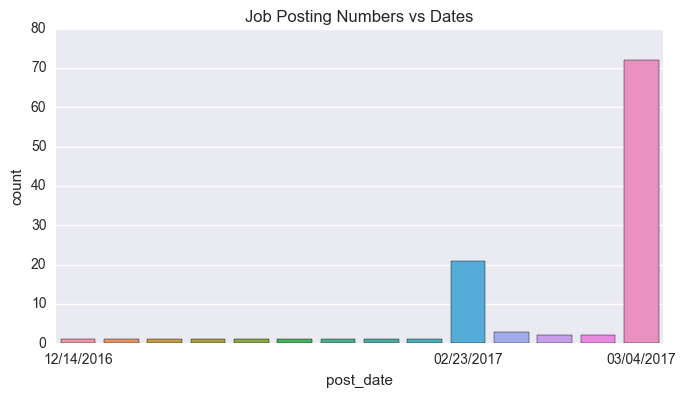

In [237]:
plot = sns.factorplot('post_date',kind = 'count',data = ds,size=4, aspect=2)
plot.set(xticklabels=['12/14/2016','','','','','','','','','02/23/2017','','','','03/04/2017'])
plt.title('Job Posting Numbers vs Dates')
plt.show()

<h2>Location

In [5]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.geocode("New York, NY")
loc

Location((40.7305991, -73.9865811, 0.0))

In [6]:
ds['location'] = ds['city']+','+ds['state']

In [7]:
lonlat = [geolocator.geocode(i) for i in ds.location]

In [230]:
lonlat[2]

Location((47.5766324, -122.2276377, 0.0))

In [8]:
Counter(ds['state'])

Counter({'AZ': 1,
         'CA': 51,
         'CO': 1,
         'CT': 2,
         'DC': 3,
         'FL': 1,
         'IL': 2,
         'KY': 1,
         'MA': 8,
         'MD': 4,
         'MO': 1,
         'NY': 14,
         'OH': 2,
         'OR': 1,
         'PA': 1,
         'SC': 1,
         'TX': 1,
         'VA': 2,
         'WA': 12})

In [9]:
import folium
from IPython.display import HTML

In [235]:
#Try
mapds = folium.Map(location=[39,-98.35], zoom_start=4)
marker_cluster = folium.MarkerCluster("Data Scientist Job").add_to(mapds)
for each in lonlat:
    folium.Marker(each[1]).add_to(marker_cluster)
    folium.MarkerCluster()
mapds.save('map.html')

The map is a seperate html file, whose name is map.html.

In [10]:
ds

,city,job_id,need_for_position,post_date,preferred_skill,salary_lower,salary_upper,state,location
0,Newton,BA-1277535,"- BS (min GPA 3.5) or MS or PhD in science, en...",2017-02-23,"Data Analytics, Informatics, Life Sciences . P...",100000.0,130000.0,MA,"Newton,MA"
1,Sunnyvale,BF1-1327877,- Networking/Security - Experience with big d...,2017-02-23,"Python, C/C++, Networking, Security, Apache Sp...",150000.0,200000.0,CA,"Sunnyvale,CA"
2,Mercer Island,RM2-1335019,More Than 3 Years of experience and knowledge ...,2017-02-23,"Big Data, Predictive Modeling, Algorithm Devel...",NaN,NaN,WA,"Mercer Island,WA"
3,Redwood City,AW2-1341356,Requirements: Bachelors in Computer Science or...,2017-02-23,"Machine Learning, Python, R, Mapreduce, Javasc...",140000.0,225000.0,CA,"Redwood City,CA"
4,Portland,CS9-1346787,Experience and knowledge of: - Machine Learnin...,2017-02-23,"Machine Learning, Data Mining, Python, ETL BI,...",100000.0,120000.0,OR,"Portland,OR"
5,Needham,PD2-1346845,- BS with a focus on life sciences. A degree i...,2017-02-23,"Data Analytics, Life Sciences, Pharmaceuticals...",100000.0,130000.0,MA,"Needham,MA"
6,Seattle,RM2-1346990,More Than 3 Years of experience and knowledge ...,2017-02-23,"Big Data, Predictive Modeling, Algorithm Devel...",NaN,NaN,WA,"Seattle,WA"
7,Newport Beach,MM5-1350722,At Least 3 Years of experience and knowledge o...,2017-02-20,"Machine Learning, Python, Linux, Java, Scala, ...",NaN,NaN,CA,"Newport Beach,CA"
8,Newport Beach,MM5-1348187,At Least 3 Years of experience and knowledge o...,2017-02-23,"Machine Learning, Python, Linux, Java, Scala, ...",NaN,NaN,CA,"Newport Beach,CA"
9,Redwood City,BK-1353240,- Expertise with large scale data manipulation...,2017-03-03,"Machine Learning, Graph Analytics, Statistical...",150000.0,200000.0,CA,"Redwood City,CA"


In [11]:
sum(pd.isnull(ds['salary_lower']))

32

In the 109 records, 32 have NaN salary.

In [12]:
ds2 = ds[pd.notnull(ds['salary_lower'])].copy()

In [13]:
ds2 = ds2[ds2.salary_lower>0]
#Only 74 records now

In [21]:
ds2['salary_mid']=(ds.salary_lower+ds.salary_upper)/2

In [22]:
ds2

,city,job_id,need_for_position,post_date,preferred_skill,salary_lower,salary_upper,state,location,part,salary_mid
0,Newton,BA-1277535,"- BS (min GPA 3.5) or MS or PhD in science, en...",2017-02-23,"Data Analytics, Informatics, Life Sciences . P...",100000.0,130000.0,MA,"Newton,MA",east,115000.0
1,Sunnyvale,BF1-1327877,- Networking/Security - Experience with big d...,2017-02-23,"Python, C/C++, Networking, Security, Apache Sp...",150000.0,200000.0,CA,"Sunnyvale,CA",west,175000.0
3,Redwood City,AW2-1341356,Requirements: Bachelors in Computer Science or...,2017-02-23,"Machine Learning, Python, R, Mapreduce, Javasc...",140000.0,225000.0,CA,"Redwood City,CA",west,182500.0
4,Portland,CS9-1346787,Experience and knowledge of: - Machine Learnin...,2017-02-23,"Machine Learning, Data Mining, Python, ETL BI,...",100000.0,120000.0,OR,"Portland,OR",west,110000.0
5,Needham,PD2-1346845,- BS with a focus on life sciences. A degree i...,2017-02-23,"Data Analytics, Life Sciences, Pharmaceuticals...",100000.0,130000.0,MA,"Needham,MA",east,115000.0
9,Redwood City,BK-1353240,- Expertise with large scale data manipulation...,2017-03-03,"Machine Learning, Graph Analytics, Statistical...",150000.0,200000.0,CA,"Redwood City,CA",west,175000.0
10,Cambridge,EE-1175143,"- BS or MS in Computer Science, Statistics, Ma...",2017-02-28,"SQL, Hive, Python/R/SAS, pandas, Data Mining, ...",95000.0,120000.0,MA,"Cambridge,MA",east,107500.0
11,Rockville,GM2-1355052,"Must Have Skills - BS/MS in Computer Science, ...",2017-03-03,"Big Data, Cloud, openStack, Hadoop, Solr, HBas...",75000.0,120000.0,MD,"Rockville,MD",east,97500.0
12,Sherman Oaks,BC2-1278839,- 5+ years extensive programming experience in...,2017-03-04,"Python, Machine Learning, Hadoop, AWS, Data Mi...",100000.0,175000.0,CA,"Sherman Oaks,CA",west,137500.0
14,West Hollywood,AG6-1326863,Minimum qualifications: PhD degree in a quanti...,2017-03-04,"Machine Learning, Python, Data Mining, R, PhD ...",100000.0,250000.0,CA,"West Hollywood,CA",west,175000.0


In [15]:
Counter(ds2.state)

Counter({'AZ': 1,
         'CA': 36,
         'CO': 1,
         'CT': 2,
         'IL': 2,
         'MA': 7,
         'MD': 2,
         'MO': 1,
         'NY': 12,
         'OH': 1,
         'OR': 1,
         'PA': 1,
         'SC': 1,
         'TX': 1,
         'VA': 1,
         'WA': 4})

In [47]:
d={}
d['east']=['CT','MA','MD','NY','PA','SC','VA','ME','VT','NH','RI','NJ','DE','WV','NC','GA','AL']
d['west']=['CA','OR','WA','AK','MO','ID','MT','NV','UT','WY']
d['other']=['AZ','CO','IL','OH','TX']

In [48]:
ds2['part']=''

In [49]:
index = [i in d['east'] for i in ds2.state]
index2 = [i in d['west'] for i in ds2.state]
index3 = [i in d['other'] for i in ds2.state]
ds2.loc[index,'part']='east'
ds2.loc[index2,'part']='west'
ds2.loc[index3,'part']='other'

In [50]:
Counter(ds2.part)

Counter({'east': 26, 'other': 6, 'west': 42})

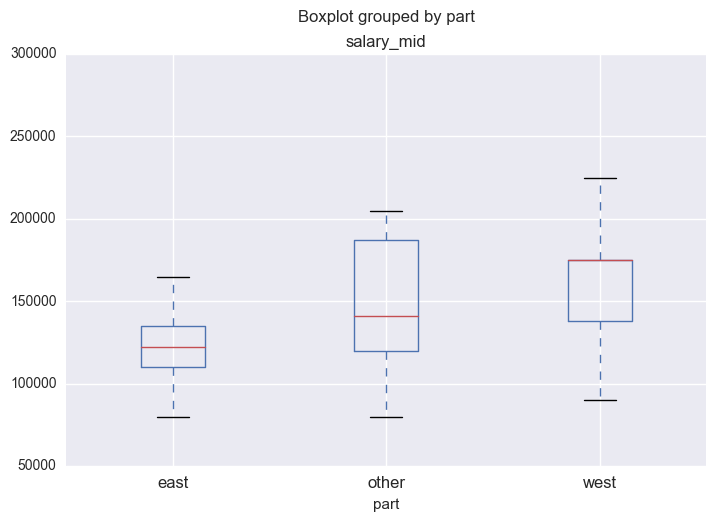

In [51]:
ds2.boxplot("salary_mid", "part")
plt.show()

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('salary_mid ~ part',
                data=ds2).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                sum_sq    df         F    PR(>F)
part      1.424035e+10   2.0  5.454681  0.006256
Residual  9.267865e+10  71.0       NaN       NaN


In [53]:
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:             salary_mid   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     5.455
Date:                Mon, 06 Mar 2017   Prob (F-statistic):            0.00626
Time:                        17:04:34   Log-Likelihood:                -880.09
No. Observations:                  74   AIC:                             1766.
Df Residuals:                      71   BIC:                             1773.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.327e+05   7085.557     18.727

Consistent with the boxplot, the salary of east and mid have no significant difference, but the west are obviously different from them.

Now, let us comapre to SDE.

In [31]:
sde = pd.read_csv('Software_Engineer.csv',index_col=False)
del sde['Unnamed: 0']

In [32]:
sde

,city,job_id,need_for_position,post_date,preferred_skill,salary_lower,salary_upper,state
0,Lexington Park,SC4-1322959,- Bachelor's Degree or higher in Engineering o...,02/02/2017,"C#, SQL, Javascript, ASP.NET",100000.0,140000.0,MD
1,Jersey City,KB6-1330411,- Extensive hands-on technical experience in U...,01/26/2017,"Unix, IDE, Java/J2EE, Python, Linux, HTML5/CSS...",90000.0,120000.0,NJ
2,Richland,DN2-1338782,At Least 1 Year of experience and knowledge of...,01/27/2017,"C#, ASP.NET, SQL, Javascript, WPF and XAML",80000.0,110000.0,WA
3,New York City,JC6-1324151,Less Than 1 Year of experience and knowledge o...,02/16/2017,"Python, Ruby on Rails, Javascript",50000.0,140000.0,NY
4,West Hollywood,BC2-1331717,"- Experience with highly available, multi-tena...",02/15/2017,"JVM, C#, .NET, NoSQL, Git",90000.0,110000.0,CA
5,Reston,CD-1314960,• Minimum 5 years of professional experience i...,02/16/2017,"Java 7, Scala, Akka, Angular.js, Hibernate, Po...",110000.0,160000.0,VA
6,Broomfield,TP2-1346300,Extensive Experience/Knowledge: -Degree in App...,02/09/2017,"C++, 3D Geometry, Geo-Spatial",100000.0,150000.0,CO
7,Tampa,CP2-1321351,At Least 1 Year of experience and knowledge of...,01/18/2017,".NET, C#, SQL, Javascript, HTML, CSS, RESTful,...",60000.0,110000.0,FL
8,Seattle,RC1-1143623,- We are looking for great developers who stri...,01/05/2017,"Python, Django, Javascript, Backbone, jQuery",85000.0,130000.0,WA
9,Seattle,RC1-1180817,At Least 3 Years of experience and knowledge o...,01/05/2017,"Python, Django, Ruby on Rails, Javascript",80000.0,120000.0,WA


In [34]:
sde2 = sde[pd.notnull(sde['salary_lower'])].copy()

In [35]:
sde2 = sde2[sde2.salary_lower>0]

In [36]:
len(sde)

200

In [37]:
len(sde2)

157

In [38]:
sde2 = sde2[sde2.salary_lower>0]

In [39]:
sde2['salary_mid']=(sde2.salary_lower+sde2.salary_upper)/2

In [46]:
Counter(sde2.state)

Counter({'AL': 2,
         'AZ': 3,
         'BC': 1,
         'CA': 41,
         'CO': 1,
         'CT': 1,
         'DC': 2,
         'FL': 4,
         'GA': 1,
         'IA': 1,
         'IL': 4,
         'KS': 1,
         'LA': 2,
         'MA': 11,
         'MD': 15,
         'MI': 3,
         'MN': 1,
         'MO': 3,
         'NC': 1,
         'NE': 2,
         'NH': 3,
         'NJ': 4,
         'NY': 11,
         'OH': 1,
         'OK': 2,
         'ON': 2,
         'PA': 1,
         'SC': 1,
         'TN': 1,
         'TX': 13,
         'UT': 2,
         'VA': 7,
         'WA': 9})

In [54]:
sde2['part']='other'
index = [i in d['east'] for i in sde2.state]
index2 = [i in d['west'] for i in sde2.state]
sde2.loc[index,'part']='east'
sde2.loc[index2,'part']='west'

In [58]:
ds2['type']='Data Scientist'
sde2['type']='Software Engineer'
dssde = ds2.append(sde2)

In [59]:
dssde

,city,job_id,location,need_for_position,part,post_date,preferred_skill,salary_lower,salary_mid,salary_upper,state,type
0,Newton,BA-1277535,"Newton,MA","- BS (min GPA 3.5) or MS or PhD in science, en...",east,2017-02-23 00:00:00,"Data Analytics, Informatics, Life Sciences . P...",100000.0,115000.0,130000.0,MA,Data Scientist
1,Sunnyvale,BF1-1327877,"Sunnyvale,CA",- Networking/Security - Experience with big d...,west,2017-02-23 00:00:00,"Python, C/C++, Networking, Security, Apache Sp...",150000.0,175000.0,200000.0,CA,Data Scientist
3,Redwood City,AW2-1341356,"Redwood City,CA",Requirements: Bachelors in Computer Science or...,west,2017-02-23 00:00:00,"Machine Learning, Python, R, Mapreduce, Javasc...",140000.0,182500.0,225000.0,CA,Data Scientist
4,Portland,CS9-1346787,"Portland,OR",Experience and knowledge of: - Machine Learnin...,west,2017-02-23 00:00:00,"Machine Learning, Data Mining, Python, ETL BI,...",100000.0,110000.0,120000.0,OR,Data Scientist
5,Needham,PD2-1346845,"Needham,MA",- BS with a focus on life sciences. A degree i...,east,2017-02-23 00:00:00,"Data Analytics, Life Sciences, Pharmaceuticals...",100000.0,115000.0,130000.0,MA,Data Scientist
9,Redwood City,BK-1353240,"Redwood City,CA",- Expertise with large scale data manipulation...,west,2017-03-03 00:00:00,"Machine Learning, Graph Analytics, Statistical...",150000.0,175000.0,200000.0,CA,Data Scientist
10,Cambridge,EE-1175143,"Cambridge,MA","- BS or MS in Computer Science, Statistics, Ma...",east,2017-02-28 00:00:00,"SQL, Hive, Python/R/SAS, pandas, Data Mining, ...",95000.0,107500.0,120000.0,MA,Data Scientist
11,Rockville,GM2-1355052,"Rockville,MD","Must Have Skills - BS/MS in Computer Science, ...",east,2017-03-03 00:00:00,"Big Data, Cloud, openStack, Hadoop, Solr, HBas...",75000.0,97500.0,120000.0,MD,Data Scientist
12,Sherman Oaks,BC2-1278839,"Sherman Oaks,CA",- 5+ years extensive programming experience in...,west,2017-03-04 00:00:00,"Python, Machine Learning, Hadoop, AWS, Data Mi...",100000.0,137500.0,175000.0,CA,Data Scientist
14,West Hollywood,AG6-1326863,"West Hollywood,CA",Minimum qualifications: PhD degree in a quanti...,west,2017-03-04 00:00:00,"Machine Learning, Python, Data Mining, R, PhD ...",100000.0,175000.0,250000.0,CA,Data Scientist


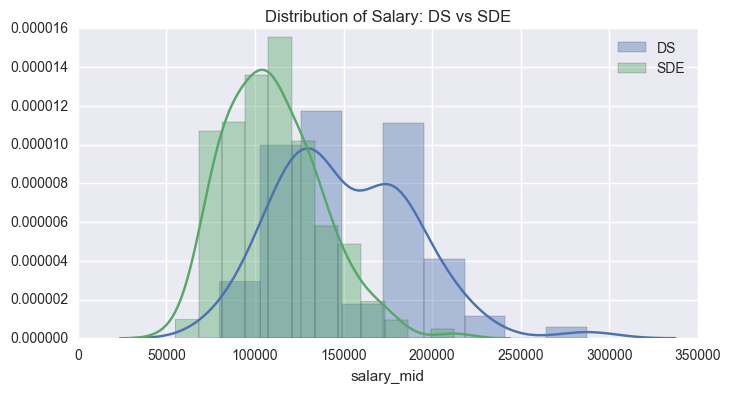

In [89]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(dssde.salary_mid[dssde['type']=='Data Scientist'],hist_kws={"label":'DS'})
sns.distplot(dssde.salary_mid[dssde['type']=='Software Engineer'],hist_kws={"label":'SDE'})
plt.title('Distribution of Salary: DS vs SDE')
plt.legend()
plt.show()

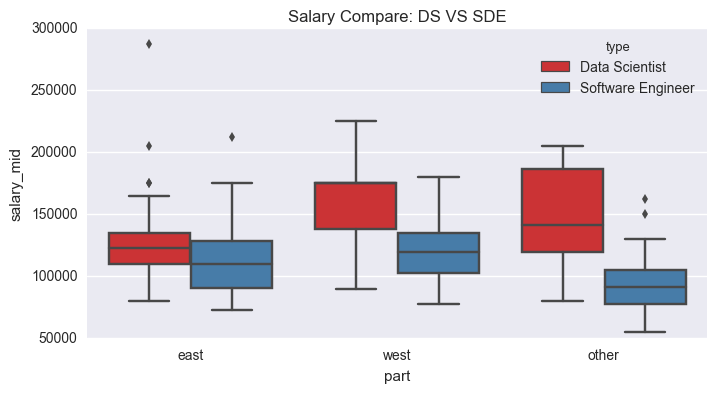

In [95]:
sns.boxplot(x="part", y="salary_mid", hue="type", data=dssde,palette="Set1")
plt.title('Salary Compare: DS VS SDE')
plt.show()

In [96]:
mod2 = ols('salary_mid ~ part+type',
                data=dssde).fit()
                
aov_table2 = sm.stats.anova_lm(mod2, typ=2)
print aov_table2

                sum_sq     df          F        PR(>F)
part      2.383304e+10    2.0  13.734130  2.341633e-06
type      5.722386e+10    1.0  65.952134  2.940663e-14
Residual  1.969583e+11  227.0        NaN           NaN


In [97]:
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:             salary_mid   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 06 Mar 2017   Prob (F-statistic):           3.96e-21
Time:                        17:38:11   Log-Likelihood:                -2702.9
No. Observations:                 231   AIC:                             5414.
Df Residuals:                     227   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

<h2>Experience

In [98]:
import re

In [103]:
ds.need_for_position = [i.lower() for i in ds.need_for_position] 

In [244]:
yoe= [re.findall(r'[0-9\-\\+0-9]+ years of ',i) for i in ds.need_for_position]

In [281]:
yoe[:5]

[[], [], ['3 years of '], [], []]

In [250]:
len(ds.need_for_position)- sum(i==[] for i in yoe)

49

Among the 109 jobs, 49 of them specify the years of experience.

In [257]:
from itertools import compress
yoe2 = list(compress(yoe, [i!=[] for i in yoe]))

In [272]:
del yoe2[8]

In [276]:
del yoe2[17]

In [277]:
yoe3 = [int(i[0][0]) for i in yoe2]

In [297]:
Counter(yoe3).keys()

[1, 2, 3, 4, 5, 8]

In [284]:
Counter(yoe3).values()

[2, 4, 26, 1, 13, 1]

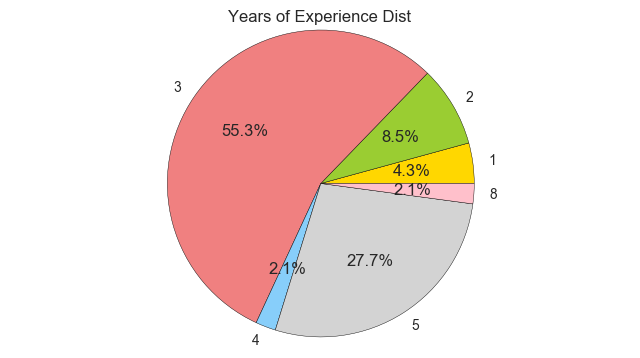

In [299]:
plt.pie(Counter(yoe3).values(), labels=Counter(yoe3).keys(), autopct='%1.1f%%',
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgrey','pink'])
plt.axis('equal')
plt.title('Years of Experience Dist')
plt.show()